In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.feature_extraction.text import CountVectorizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
import re

In [2]:
import tensorflow as tf  

In [3]:
#pip list

In [4]:
data  = pd.read_csv('anti-bully-data.csv')

In [5]:
data

,label_bullying,text_message
0,0,yeah I got 2 backups for all that. I just hate...
1,0,I hate using my BB but love my iPhone. Haven'...
2,1,Get fucking real dude.
3,1,She is as dirty as they come and that crook ...
4,1,why did you fuck it up. I could do it all day...
...,...,...
8823,0,no caffiene would kick my ass too - I'm addict...
8824,0,Now I'm hungry. Damn you people and your midn...
8825,0,i've taken one also. people just piss me off m...
8826,0,That too! Or even being able to park pulling ...


In [6]:
data['label_bullying'].unique()

array([0, 1], dtype=int64)

In [7]:
data[data['label_bullying']==1].shape

(2517, 2)

In [8]:
data[data['label_bullying']==0].shape

(6311, 2)

In [9]:
data =data.dropna()

In [10]:
data 

,label_bullying,text_message
0,0,yeah I got 2 backups for all that. I just hate...
1,0,I hate using my BB but love my iPhone. Haven'...
2,1,Get fucking real dude.
3,1,She is as dirty as they come and that crook ...
4,1,why did you fuck it up. I could do it all day...
...,...,...
8823,0,no caffiene would kick my ass too - I'm addict...
8824,0,Now I'm hungry. Damn you people and your midn...
8825,0,i've taken one also. people just piss me off m...
8826,0,That too! Or even being able to park pulling ...


In [11]:
data['text_message'].unique()

array(['yeah I got 2 backups for all that. I just hate when that happen. I been strugglin for a week now...handle that tho',
       "I hate using my BB  but love my iPhone. Haven't tried the new BB. My BB is provided by my corp. I don't get to pick which model",
       ' Get fucking real dude.', ...,
       "i've taken one also. people just piss me off more & more recently",
       'That  too! Or even being able to park pulling in forward rather than backwards--I hate when the car behind me pulls up and BLOCKS!',
       ". . . HE'S FUCKING HIMSELF!"], dtype=object)

In [12]:
data = data[['text_message','label_bullying']]

In [13]:
data['text_message'] = data['text_message'].apply(lambda x: x.lower())
data['text_message'] = data['text_message'].apply((lambda x: re.sub('[^a-zA-z0-9\s]','',x)))

In [14]:
for idx,row in data.iterrows():
    row[0] = row[0].replace('rt',' ')
    
max_fatures = 2000
tokenizer = Tokenizer(num_words=max_fatures, split=' ')
tokenizer.fit_on_texts(data['text_message'].values)
X = tokenizer.texts_to_sequences(data['text_message'].values)
X = pad_sequences(X)

In [15]:
X

array([[   0,    0,    0, ...,  253,    6,  317],
       [   0,    0,    0, ...,  545,  294, 1773],
       [   0,    0,    0, ...,   35,  278,  149],
       ...,
       [   0,    0,    0, ...,   81,   81,  954],
       [   0,    0,    0, ...,   41,    9, 1802],
       [   0,    0,    0, ...,  144,   35, 1213]])

In [16]:
embed_dim = 100
lstm_out = 126

model = Sequential()
model.add(Embedding(max_fatures, embed_dim,input_length = X.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(2,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 30, 100)           200000    
                                                                 
 spatial_dropout1d (SpatialD  (None, 30, 100)          0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 126)               114408    
                                                                 
 dense (Dense)               (None, 2)                 254       
                                                                 
Total params: 314,662
Trainable params: 314,662
Non-trainable params: 0
_________________________________________________________________
None


In [17]:
Y = pd.get_dummies(data['label_bullying']).values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.33, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(5914, 30) (5914, 2)
(2914, 30) (2914, 2)


In [18]:
batch_size = 10
model.fit(X_train, Y_train, epochs = 20, batch_size=batch_size, verbose = 2)

Epoch 1/20
592/592 - 22s - loss: 0.5842 - accuracy: 0.7195 - 22s/epoch - 37ms/step
Epoch 2/20
592/592 - 19s - loss: 0.5371 - accuracy: 0.7371 - 19s/epoch - 32ms/step
Epoch 3/20
592/592 - 19s - loss: 0.4890 - accuracy: 0.7575 - 19s/epoch - 32ms/step
Epoch 4/20
592/592 - 19s - loss: 0.4364 - accuracy: 0.7934 - 19s/epoch - 32ms/step
Epoch 5/20
592/592 - 19s - loss: 0.3938 - accuracy: 0.8167 - 19s/epoch - 32ms/step
Epoch 6/20
592/592 - 19s - loss: 0.3576 - accuracy: 0.8367 - 19s/epoch - 32ms/step
Epoch 7/20
592/592 - 19s - loss: 0.3177 - accuracy: 0.8520 - 19s/epoch - 32ms/step
Epoch 8/20
592/592 - 19s - loss: 0.2870 - accuracy: 0.8678 - 19s/epoch - 32ms/step
Epoch 9/20
592/592 - 19s - loss: 0.2533 - accuracy: 0.8840 - 19s/epoch - 32ms/step
Epoch 10/20
592/592 - 19s - loss: 0.2331 - accuracy: 0.8972 - 19s/epoch - 32ms/step
Epoch 11/20
592/592 - 19s - loss: 0.2120 - accuracy: 0.9065 - 19s/epoch - 32ms/step
Epoch 12/20
592/592 - 19s - loss: 0.1929 - accuracy: 0.9165 - 19s/epoch - 32ms/step
E

In [19]:

y_test_arg=np.argmax(Y_train,axis=1)
Y_pred = np.argmax(model.predict(X_train),axis=1)
print('Confusion Matrix')

185/185 [==============================] - 2s 7ms/step
Confusion Matrix


In [20]:
import sklearn.metrics

In [21]:
print(sklearn.metrics.classification_report(y_test_arg, Y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      4254
           1       0.96      0.96      0.96      1660

    accuracy                           0.98      5914
   macro avg       0.97      0.97      0.97      5914
weighted avg       0.98      0.98      0.98      5914



In [22]:
from sklearn.metrics import confusion_matrix

In [23]:
print(confusion_matrix(y_test_arg, Y_pred))

[[4194   60]
 [  73 1587]]


In [24]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test_arg, Y_pred)
cm


array([[4194,   60],
       [  73, 1587]], dtype=int64)

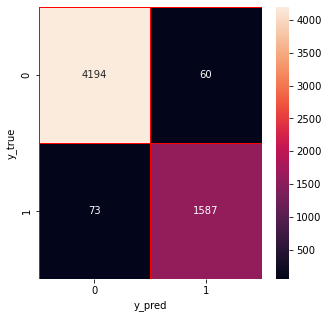

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

f, ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [26]:
import pickle

In [27]:
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [28]:
model.save('lstms.h5')

In [53]:
twt = ["Hello Beautiful"]
#vectorizing the tweet by the pre-fitted tokenizer instance
twt = tokenizer.texts_to_sequences(twt)

In [54]:
print(twt)

[[1950, 777]]


In [55]:
print(twt)

[[1950, 777]]


In [56]:
twt = pad_sequences(twt, maxlen=30, dtype='int32', value=0)
print(twt)
sentiment = model.predict(twt,batch_size=1,verbose = 2)[0]
print(sentiment)
if(np.argmax(sentiment) == 1):
    print("bullying")
elif (np.argmax(sentiment) == 0):
    print("No_bullying")

[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
  1950  777]]
1/1 - 0s - 15ms/epoch - 15ms/step
[9.9993229e-01 6.7689834e-05]
No_bullying
